# MyoSuite Tutorial 2023
## How to load a `MyoSuite v2` model, drive and visualize movements
> This source code is licensed under the Apache license found in the [LICENSE](https://github.com/myohub/myosuite/blob/main/LICENSE) file.


In order to run this netebook you need to:
1. Install all the required package
2. Run the whole sequence of cells

## 1) Installation

### Installing dependencies and `MyoSuite` in the Colab

In [1]:
!pip install git+https://github.com/facebookresearch/myosuite.git --quiet
!pip install 'stable-baselines3[extra]' --quiet
!pip install tqdm --quiet
%env MUJOCO_GL=enable
import mujoco

env: MUJOCO_GL=enable


### Define a method to show the rendering inside the Colab

In [2]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 400):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video autoplay width={video_width} controls><source src="{video_url}"></video>""")


### All the `MyoSuite` imports needed to run this tutorial

In [5]:
%env MUJOCO_GL=enable
import myosuite
from myosuite.utils import gym

import skvideo.io
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

env: MUJOCO_GL=enable


## 2) Load one of the `MyoSuite` tasks
(see the complete set and descriptions [here](https://github.com/facebookresearch/myosuite/tree/main/myosuite/envs/myo))

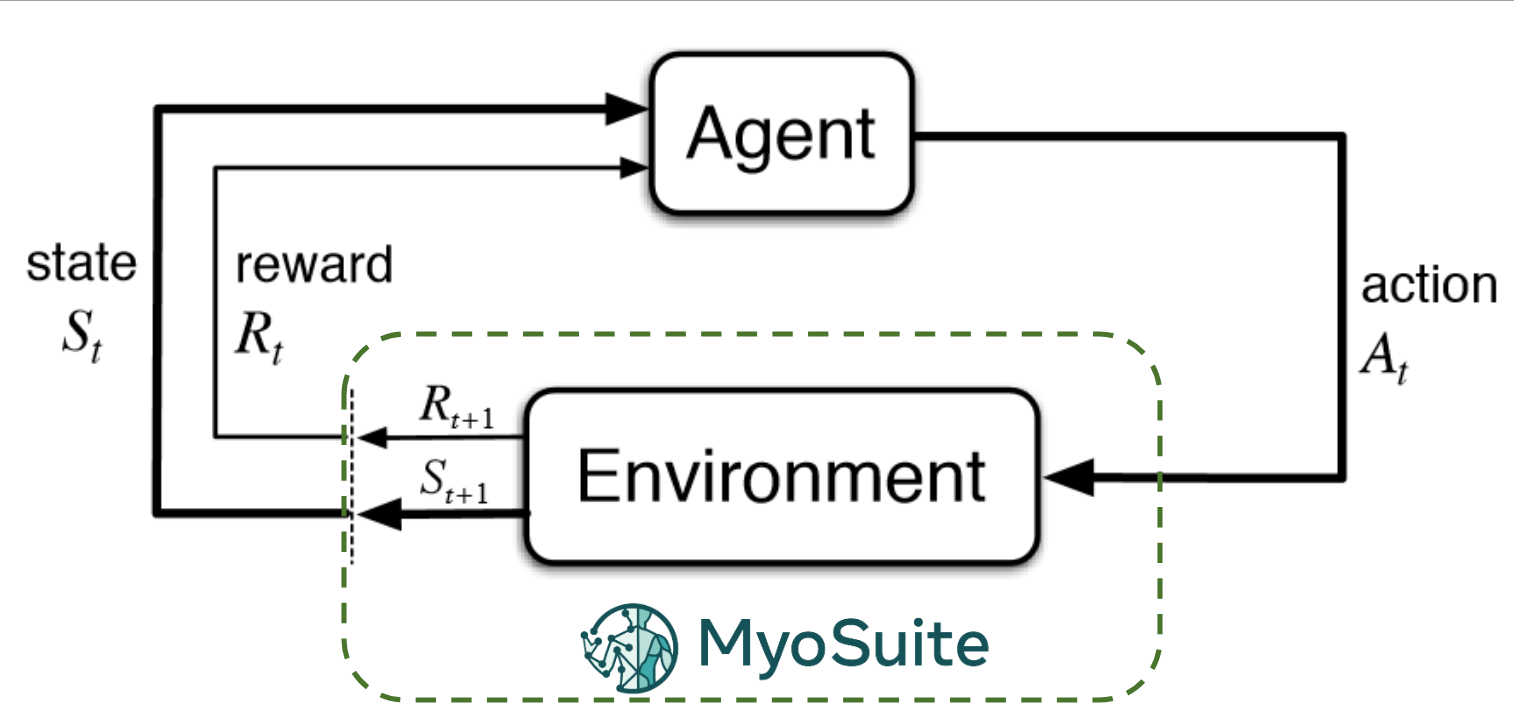

#### Creation of the environment (env)

env = gym.make(< name of the environment >)

#### Interact wiht the evnironment vias actions
state, reward, _, _ = env.step(action)

env: MUJOCO_GL=enable
    MyoSuite: A contact-rich simulation suite for musculoskeletal motor control
        Vittorio Caggiano, Huawei Wang, Guillaume Durandau, Massimo Sartori, Vikash Kumar
        L4DC-2019 | https://sites.google.com/view/myosuite
    


/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(


(-0.5, 399.5, 399.5, -0.5)

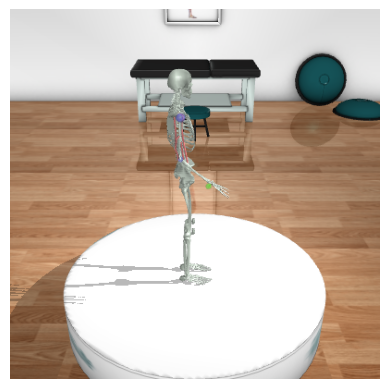

In [6]:
import myosuite
from myosuite.utils import gym
%env MUJOCO_GL=enable
env = gym.make('myoElbowPose1D6MRandom-v0')
# print('List of cameras available', [env.sim.model.camera(i).name for i in range(env.sim.model.ncam)])
env.reset()
im = env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=0)
plt.imshow(im)
plt.axis('off')

In [7]:
env = gym.make('myoElbowPose1D6MRandom-v0')
env.reset()
# random value as an action
action = env.action_space.sample()

observation_state, reward, done, _, info = env.step(action)

# myoElbowPose1D6MRandom-v0 is a pose-type task
# see definition here https://github.com/facebookresearch/myosuite/blob/1d45e4d5603a70487355902450006d3bd7828d43/myosuite/envs/myo/pose_v0.py#L89

print(f"Observation dimension {len(observation_state)}")
# Observation is composed of: qpos [1], qvel [1], act [6], pose_err [1]
print(f"Observation values: {observation_state}")

# Information about the task reward
print(f"Reward value: {reward}")

# Flag to check if the task is done
print(f"Is Done: {done}")

# All the info relative to the environment i.e. reward (dense/sparse), task is solved, ...
print(f"The overall info: {info.keys()}")
# Specifically, the information relative to the state
print(f"Info contained contained the info['state']: {info['state'].keys()}")


Observation dimension 9
Observation values: [ 1.7855 -0.0044 -1.4396  0.4195  0.4775  0.5195  0.6655  0.0296  0.7547]
Reward value: -1.6560789386926023
Is Done: False
The overall info: dict_keys(['time', 'rwd_dense', 'rwd_sparse', 'solved', 'done', 'obs_dict', 'visual_dict', 'proprio_dict', 'rwd_dict', 'state'])
Info contained contained the info['state']: dict_keys(['time', 'qpos', 'qvel', 'act', 'mocap_pos', 'mocap_quat', 'site_pos', 'site_quat', 'body_pos', 'body_quat'])


### Generate some random movements
1. Reset the environment
2. Render the visualization of the environment
3. Send a random set of movements
4. Close the environment

In [8]:
import myosuite
from myosuite.utils import gym
%env MUJOCO_GL=enable
env = gym.make('myoElbowPose1D6MRandom-v0')
env.reset()
frames = []
for _ in tqdm(range(20)):
    frames.append(env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=0))
    env.step(env.action_space.sample()) # take a random action
env.close()

env: MUJOCO_GL=enable


/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/ipykernel_78728/1804895766.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(20)):


  0%|          | 0/20 [00:00<?, ?it/s]

### Save the frames from the rendering and play in the Colab

The frames extreacted in the previous steps are now first stored into a mp4 file and the shown in the notebook

In [9]:
os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/ElbowPose.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})

# show in the notebook
show_video('videos/ElbowPose.mp4')

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.wr

## 3) Training a policy (elbow)
This cell presentes how to train and evaluate a policy

In [10]:
import myosuite
from myosuite.utils import gym
from stable_baselines3 import PPO
env = gym.make('myoElbowPose1D6MRandom-v0')

model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=100)


In [11]:
# evaluate policy
all_rewards = []
for _ in tqdm(range(20)): # 20 random targets
  ep_rewards = []
  done = False
  obs, _ = env.reset()
  for _ in range(40):
      # get the next action from the policy
      action, _ = model.predict(obs)
      # take an action based on the current observation
      obs, reward, done, _, info = env.step(action)
      ep_rewards.append(reward)
  all_rewards.append(np.sum(ep_rewards))
print(f"Average reward: {np.mean(all_rewards)} over 20 episodes")


/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/ipykernel_78728/3215893786.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(20)): # 20 random targets


  0%|          | 0/20 [00:00<?, ?it/s]

Average reward: 31.5729588697781 over 20 episodes


### Playback a policy
Here, a policy trained for a larger number of iterations is loaded and used to solve the tasks. Then, the results are rendered.

In [12]:
env = gym.make('myoElbowPose1D6MRandom-v0')

!pip install git+https://github.com/aravindr93/mjrl.git@pvr_beta_1vk # install from branch `pvr_beta_1vk` compatible with `mujoco` native binding

# download a trained policy from the MyoSuite repo
!curl -OL "https://github.com/facebookresearch/myosuite/raw/main/myosuite/agents/baslines_NPG/myoElbowPose1D6MRandom-v0/2022-02-26_21-16-27/33_env=myoElbowPose1D6MRandom-v0,seed=1/iterations/best_policy.pickle"
policy = "best_policy.pickle"

import pickle
# load policy
pi = pickle.load(open(policy, 'rb'))

frames = []
for _ in tqdm(range(20)): # 20 random targets
  env.reset()
  ep_rewards = []
  done = False
  obs, _ = env.reset()
  for _ in range(40):
      o = env.get_obs()
      # get the next action from the policy
      action, _ = pi.get_action(o)
      # take an action based on the current observation
      obs, reward, done, _, info = env.step(action)
      ep_rewards.append(reward)
  all_rewards.append(np.sum(ep_rewards))

print(f"Average reward: {np.mean(all_rewards)} over 20 episodes")


env.close()


  Cloning https://github.com/aravindr93/mjrl.git (to revision pvr_beta_1vk) to /private/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/pip-req-build-xna6saqe
  Running command git clone --filter=blob:none --quiet https://github.com/aravindr93/mjrl.git /private/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/pip-req-build-xna6saqe
  Running command git checkout -b pvr_beta_1vk --track origin/pvr_beta_1vk
  Switched to a new branch 'pvr_beta_1vk'
  branch 'pvr_beta_1vk' set up to track 'origin/pvr_beta_1vk'.
  Resolved https://github.com/aravindr93/mjrl.git to commit 6e058535b8f0fa3368ce33e7090abbf275f9307e
  Preparing metadata (setup.py) ... done
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22753  100 22753    0    

/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/ipykernel_78728/3918080052.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(20)): # 20 random targets


  0%|          | 0/20 [00:00<?, ?it/s]

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_obs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_obs` for environment variables or `env.get_wrapper_attr('get_obs')` that will search the reminding wrappers.
  logger.warn(


Average reward: 164.28676390071124 over 20 episodes


In [13]:
# Render trained policy
frames = []
for _ in tqdm(range(5)): # 5 random targets
  env.reset()
  ep_rewards = []
  done = False
  obs, _ = env.reset()
  for _ in range(20):
      frame = env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=0)
      frames.append(frame)
      o = env.get_obs()
      # get the next action from the policy
      action, _ = pi.get_action(o)
      # take an action based on the current observation
      obs, reward, done, _, info = env.step(action)

env.close()

os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/test_policy.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})
show_video('videos/test_policy.mp4')

/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/ipykernel_78728/3688373380.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(5)): # 5 random targets


  0%|          | 0/5 [00:00<?, ?it/s]

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/minico

## 4) Change tasks' targets
We offer all tasks in a `Fixed` (easier) and `Random` (harder) version.

In [14]:
env_fix = gym.make('myoElbowPose1D6MFixed-v0')
env_rand = gym.make('myoElbowPose1D6MRandom-v0')

for ep in range(10):
  env_fix.reset()
  print(f"Episode {ep}, target: {env_fix.env.get_target_pose()[0]}")

for ep in range(10):
  env_rand.reset()
  print(f"Episode {ep}, target: {env_rand.env.get_target_pose()[0]}")


Episode 0, target: 2.0
Episode 1, target: 2.0
Episode 2, target: 2.0
Episode 3, target: 2.0
Episode 4, target: 2.0
Episode 5, target: 2.0
Episode 6, target: 2.0
Episode 7, target: 2.0
Episode 8, target: 2.0
Episode 9, target: 2.0
Episode 0, target: 2.0207283822542705
Episode 1, target: 2.1463955310789933
Episode 2, target: 1.8096203532082489
Episode 3, target: 1.543903943465856
Episode 4, target: 0.05578257531893151
Episode 5, target: 0.2821594240295347
Episode 6, target: 1.7171326547765908
Episode 7, target: 1.0831466158905552
Episode 8, target: 0.8217514588374096
Episode 9, target: 0.3054202740700453


/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_target_pose to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_target_pose` for environment variables or `env.get_wrapper_attr('get_target_pose')` that will search the reminding wrappers.
  logger.warn(


Often we want to test/evaluate a policy on a selected set of conditions. It is possible to change the fixed (or Random) environment to be evaulated on a fixed target.

In [15]:
# Only for Elbow, test different posture
env = gym.make('myoElbowPose1D6MFixed-v0')
# Sequence of test angles
AngleSequence = [60, 0, 80, 30]
# Flag to enable a sequence of different fixed targets
env.env.target_type = 'fixed'

env.reset()
frames = []
for ep in tqdm(range(len(AngleSequence))):
    print("Ep {} of {} testing angle {}".format(ep, len(AngleSequence), AngleSequence[ep]))

    # Set the new target value
    env.unwrapped.target_jnt_value = [np.deg2rad(AngleSequence[int(ep)])]
    # Update the target value
    env.unwrapped.update_target()

    for _ in range(20):
        frames.append(env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=0))
        o = env.get_obs()
        a = pi.get_action(o)[0]
        next_o, r, done, _, _ = env.step(a) # take an action based on the current observation
env.close()

os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/arm.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})
show_video('videos/arm.mp4')

/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/ipykernel_78728/2203015955.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ep in tqdm(range(len(AngleSequence))):


  0%|          | 0/4 [00:00<?, ?it/s]

Ep 0 of 4 testing angle 60
Ep 1 of 4 testing angle 0
Ep 2 of 4 testing angle 80
Ep 3 of 4 testing angle 30


/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.wr

## 5) Extract information about musculoskeletal model

In [16]:
data_store = []
env.reset()
frames = []
for ep in range(len(AngleSequence)):
    print("Ep {} of {} testing angle {}".format(ep, len(AngleSequence), AngleSequence[ep]))
    env.unwrapped.target_jnt_value = [np.deg2rad(AngleSequence[int(ep)])]
    env.unwrapped.target_type = 'fixed'
    env.unwrapped.update_target()
    for _ in range(50):
        o = env.get_obs()
        a = pi.get_action(o)[0]
        next_o, r, done, _, _ = env.step(a) # take an action based on the current observation

        data_store.append({"action":a.copy(), # action / control
                            "jpos":env.sim.data.qpos.copy(), # joint position
                            "mlen":env.sim.data.actuator_length.copy(), # actuator length
                            "act":env.sim.data.act.copy()}) # actuator activations
env.close()

Ep 0 of 4 testing angle 60
Ep 1 of 4 testing angle 0
Ep 2 of 4 testing angle 80
Ep 3 of 4 testing angle 30


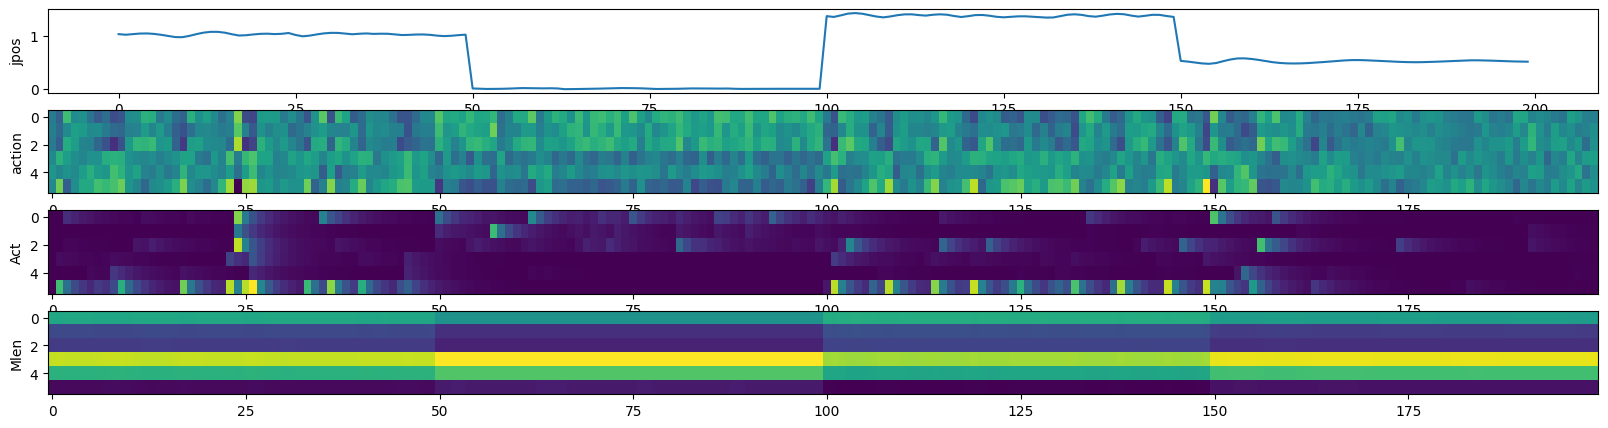

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.subplot(411),plt.plot(np.array([d['jpos'] for d in data_store])),plt.ylabel('jpos')
plt.subplot(412),plt.imshow(np.array([d['action'] for d in data_store]).T, aspect='auto'),plt.ylabel('action')
plt.subplot(413),plt.imshow(np.array([d['act'] for d in data_store]).T, aspect='auto'),plt.ylabel('Act')
plt.subplot(414),plt.imshow(np.array([d['mlen'] for d in data_store]).T, aspect='auto'),plt.ylabel('Mlen')

plt.show()

## 6) Task variation: Sarcopenia

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.target_jnt_value to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.target_jnt_value` for environment variables or `env.get_wrapper_attr('target_jnt_value')` that will search the reminding wrappers.
  logger.warn(


Muscle: TRIlong 	Force Gain normal 769.595 with Sarcopenia 384.7975
Muscle: TRIlat 	Force Gain normal 604.403 with Sarcopenia 302.2015
Muscle: TRImed 	Force Gain normal 604.231 with Sarcopenia 302.1155
Muscle: BIClong 	Force Gain normal 607.75 with Sarcopenia 303.875
Muscle: BICshort 	Force Gain normal 423.688 with Sarcopenia 211.844
Muscle: BRA 	Force Gain normal 976.169 with Sarcopenia 488.0845


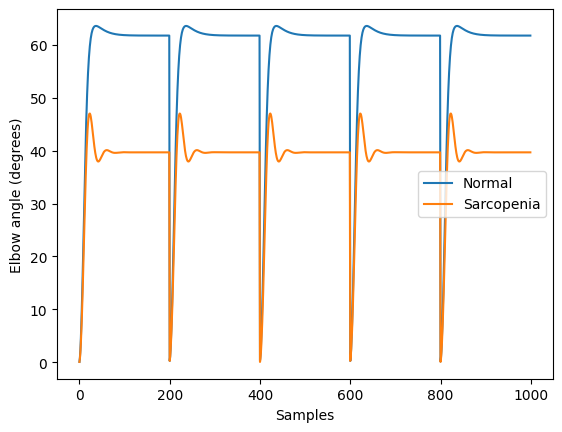

In [18]:
import numpy as np
import myosuite
from myosuite.utils import gym
env = gym.make('myoElbowPose1D6MFixed-v0')
dataN = []
for _ in range(5): # 5 episodes
  env.reset()
  # start from posture of 0 radiants
  env.sim.data.qpos[:] = 0
  for _ in range(200): # 200 samples
    # set an action only to elbow flexors
    a = np.array([0,0,0,.1,.1,.1])
    next_o, r, done, _, ifo = env.step(a)
    dataN.append({"action":a.copy(),
                "target":env.env.target_jnt_value.copy(),
                "jpos":env.sim.data.qpos.copy(),
                "mlen":env.sim.data.actuator_length.copy(),
                "act":env.sim.data.act.copy(),
                "mForce":env.sim.data.actuator_force.copy().squeeze(),
                "mForce_gain":env.sim.model.actuator_gainprm[:,2].copy()})
env.close()

env_sarc = gym.make('myoSarcElbowPose1D6MFixed-v0')
dataS = []
for _ in range(5): # 5 episodes
  env_sarc.reset()
  # start from posture of 0 radiants
  env_sarc.sim.data.qpos[:] = 0
  for _ in range(200): # 200 samples
    # set an action only to elbow flexors
    a = np.array([0,0,0,.1,.1,.1])
    next_o, r, done, _, info = env_sarc.step(a)
    dataS.append({"action":a.copy(),
                "target":env_sarc.env.target_jnt_value.copy(),
                "jpos":env_sarc.sim.data.qpos.copy(),
                "mlen":env_sarc.sim.data.actuator_length.copy(),
                "act":env_sarc.sim.data.act.copy(),
                "mForce":env_sarc.sim.data.actuator_force.copy().squeeze(),
                "mForce_gain":env_sarc.sim.model.actuator_gainprm[:,2].copy()})
env_sarc.close()

for ia in range(env.sim.model.na):
  act_h = env.sim.model.actuator(ia)
  act_sarc_h = env_sarc.sim.model.actuator(ia)
  print(f"Muscle: {act_h.name} \tForce Gain normal {act_h.gainprm[2]} with Sarcopenia {act_sarc_h.gainprm[2]}")

import matplotlib.pyplot as plt
plt.plot(np.rad2deg([v['jpos'] for v in dataN]),label='Normal'),
plt.plot(np.rad2deg([v['jpos'] for v in dataS]),label='Sarcopenia'),
plt.ylabel('Elbow angle (degrees)')
plt.xlabel('Samples')
plt.legend()
plt.show()

## 7) Advance **rendering**        

### Remove contact surfaces


(<Axes: >,
 (-0.5, 399.5, 399.5, -0.5))

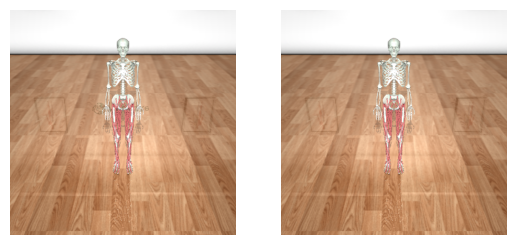

In [19]:
import myosuite
from myosuite.utils import gym
env = gym.make('myoLegWalk-v0')


frame = env.sim.renderer.render_offscreen(
                                width=400,
                                height=400,
                                camera_id=1)
plt.subplot(121),plt.imshow(frame),plt.axis('off')

# find geometries with ID == 1 which indicates the skins
geom_1_indices = np.where(env.sim.model.geom_group == 1)
# Change the alpha value to make it transparent
env.sim.model.geom_rgba[geom_1_indices, 3] = 0
frame = env.sim.renderer.render_offscreen(
                                width=400,
                                height=400,
                                camera_id=1)
plt.subplot(122),plt.imshow(frame),plt.axis('off')



### Enable muscle activations


In [20]:
from tqdm import tqdm_notebook as tqdm
import myosuite
from myosuite.utils import gym
env = gym.make('myoLegWalk-v0')


# find geometries with ID == 1 which indicates the skins
geom_1_indices = np.where(env.sim.model.geom_group == 1)
# Change the alpha value to make it transparent
env.sim.model.geom_rgba[geom_1_indices, 3] = 0

env.sim.renderer.set_viewer_settings(
           render_actuator=True,
           render_tendon=True
       )

env.reset()
frames = []
for _ in tqdm(range(50)):
    frame = env.sim.renderer.render_offscreen(
                                width=400,
                                height=400,
                                camera_id=1)
    frames.append(frame)
    next_o, r, done, _, ifo = env.step(env.action_space.sample()) # take a random action
env.close()

os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/legs_muscle_rendering.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})
show_video('videos/legs_muscle_rendering.mp4')


/var/folders/2z/wyl2pwq12kvdsj7h_92dqkzm0000gn/T/ipykernel_78728/3116194383.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(50)):


  0%|          | 0/50 [00:00<?, ?it/s]

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.wr